<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/model-building/DecisionTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DecisionTreeClassifier Evaluation Metrics:
Accuracy: 0.8480
AUC: 0.8467
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       249
           1       0.88      0.84      0.86       297

    accuracy                           0.85       546
   macro avg       0.85      0.85      0.85       546
weighted avg       0.85      0.85      0.85       546


Confusion Matrix:
[[214  35]
 [ 48 249]]

Sensitivity (Recall): 0.8384
Mean Absolute Error (MAE): 0.1520
Cohen's Kappa Score: 0.6949


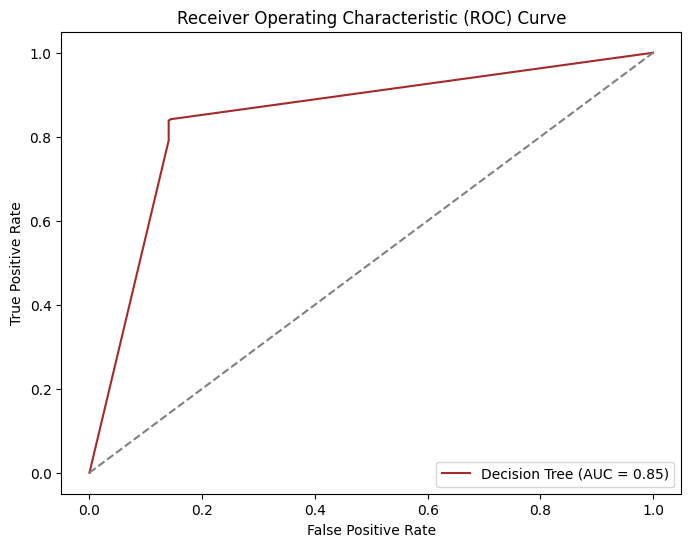

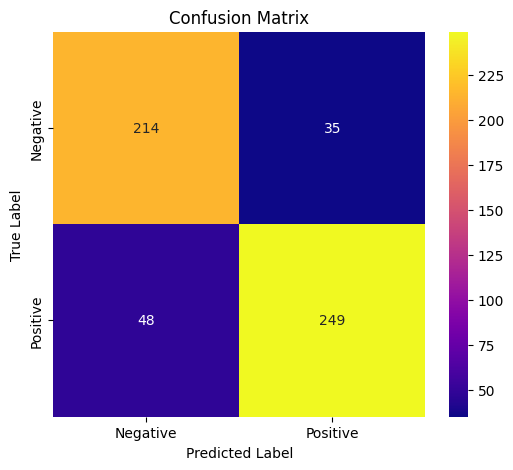

<ipython-input-1-bdea10e94b50>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values, palette="coolwarm")


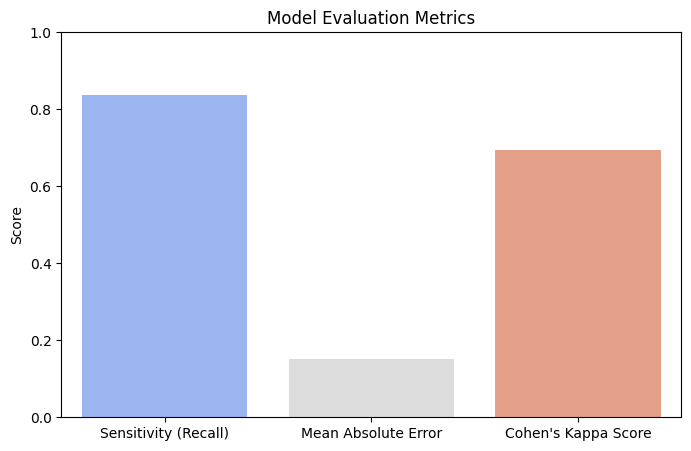

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report,
    confusion_matrix, mean_absolute_error, cohen_kappa_score, roc_curve, auc
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random
import pandas as pd

# Set random seeds for reproducibility
np.random.seed(42)
random.seed(42)

# Load dataset
df = pd.read_csv('/content/combined_dataset_fs_2.csv')

# Prepare data
df = df.drop('Unnamed: 0', axis=1)
X = df.drop(["bioactivity_class"], axis=1)
Y = df["bioactivity_class"]

# Train-Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=42)

# Initialize and Train DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, Y_train)

# Predictions
y_pred = dt.predict(X_test)
y_pred_proba = dt.predict_proba(X_test)[:, 1]

# Evaluation Metrics
accuracy = accuracy_score(Y_test, y_pred)
auc_score = roc_auc_score(Y_test, y_pred_proba)
clf_report = classification_report(Y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
sensitivity = conf_matrix[1, 1] / (conf_matrix[1, 0] + conf_matrix[1, 1])
mae = mean_absolute_error(Y_test, y_pred)
kappa = cohen_kappa_score(Y_test, y_pred)

# Print Results
print("DecisionTreeClassifier Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc_score:.4f}")
print(f"Classification Report:\n{clf_report}")
print("\nConfusion Matrix:")
print(conf_matrix)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Cohen's Kappa Score: {kappa:.4f}")

# ROC Curve Plot
fpr, tpr, _ = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='brown', label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="plasma", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Bar Plot for Sensitivity, MAE, and Kappa Score
metrics = ["Sensitivity (Recall)", "Mean Absolute Error", "Cohen's Kappa Score"]
values = [sensitivity, mae, kappa]

plt.figure(figsize=(8, 5))
sns.barplot(x=metrics, y=values, palette="coolwarm")
plt.ylabel("Score")
plt.title("Model Evaluation Metrics")
plt.ylim(0, 1)  # Metrics are between 0 and 1
plt.show()
